## Decisive Distributions

### Import Dependencies

In [1]:
# Import libraries and dependencies
import os
import pandas as pd
import alpaca_trade_api as tradeapi

# Load .env enviroment variables
from dotenv import load_dotenv

load_dotenv("alpaca.env")

%matplotlib inline

In [2]:
# Setup Alpaca API environment
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [3]:
# Set timeframe to "1Day"
timeframe = "1Day"

# Set start and end datetimes of 1 year, between now and 365 days ago.
start_date = pd.Timestamp("2019-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()

# Set the stock tickers
ticker = ["SPY", "LUV", "DIS", "AAPL", "SBUX", "WORK"]

# Get 1 year's worth of historical data for all stocks
# HINT: Set "limit" to 10000 so all ticker rows are captured from get_bars()
df_ticker = api.get_bars(
    ticker,
    timeframe,
    limit=10000,
    start=start_date,
    end=end_date
).df


# Display sample data
df_ticker.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2019-05-01 04:00:00+00:00,209.88,215.3100,209.230,210.52,64827505,441450,212.670859,AAPL
2019-05-02 04:00:00+00:00,209.84,212.6500,208.130,209.15,32000324,233410,210.155469,AAPL
2019-05-03 04:00:00+00:00,210.89,211.8400,210.230,211.75,21092378,148449,211.161771,AAPL
2019-05-06 04:00:00+00:00,204.29,208.8400,203.500,208.48,32444375,236173,207.309513,AAPL
2019-05-07 04:00:00+00:00,205.88,207.4175,200.825,202.86,38763698,294532,203.568951,AAPL


In [4]:
# Reorganize the DataFrame
# Separate ticker data
SPY = df_ticker[df_ticker['symbol']=='SPY'].drop('symbol', axis=1)
LUV = df_ticker[df_ticker['symbol']=='LUV'].drop('symbol', axis=1)
DIS = df_ticker[df_ticker['symbol']=='DIS'].drop('symbol', axis=1)
AAPL = df_ticker[df_ticker['symbol']=='AAPL'].drop('symbol', axis=1)
SBUX = df_ticker[df_ticker['symbol']=='SBUX'].drop('symbol', axis=1)
WORK = df_ticker[df_ticker['symbol']=='WORK'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_ticker = pd.concat([SPY, LUV, DIS, AAPL, SBUX, WORK], axis=1, keys=["SPY", "LUV", "DIS", "AAPL", "SBUX", "WORK"])
# Display sample data
df_ticker.head()

SPY                                           LUV  \
                          open high low close volume trade_count vwap   open   
timestamp                                                                      
2019-05-01 04:00:00+00:00  NaN  NaN NaN   NaN    NaN         NaN  NaN  54.60   
2019-05-02 04:00:00+00:00  NaN  NaN NaN   NaN    NaN         NaN  NaN  53.99   
2019-05-03 04:00:00+00:00  NaN  NaN NaN   NaN    NaN         NaN  NaN  53.52   
2019-05-06 04:00:00+00:00  NaN  NaN NaN   NaN    NaN         NaN  NaN  52.81   
2019-05-07 04:00:00+00:00  NaN  NaN NaN   NaN    NaN         NaN  NaN  53.04   

                                          ...       SBUX              \
                            high     low  ...     volume trade_count   
timestamp                                 ...                          
2019-05-01 04:00:00+00:00  54.61  53.855  ...  6678194.0     50558.0   
2019-05-02 04:00:00+00:00  54.49  53.360  ...  6247550.0     50730.0   
2019-05-03 04:00:00+00:00  53.93  53.285  ...  4967928.0     39845.0   
2019-05-06 04:00:00+00:00  53.61  52.720  ...  5607843.0     46777.0   
2019-05-07 04:00:00+00:00  53.12  51.450  ...  8115808.0     71206.0   

                                     WORK                                    \
                                vwap open high low close volume trade_count   
timestamp                                                                     
2019-05-01 04:00:00+00:00  77.684302  NaN  NaN NaN   NaN    NaN         NaN   
2019-05-02 04:00:00+00:00  77.272023  NaN  NaN NaN   NaN    NaN         NaN   
2019-05-03 04:00:00+00:00  78.009787  NaN  NaN NaN   NaN    NaN         NaN   
2019-05-06 04:00:00+00:00  77.731052  NaN  NaN NaN   NaN    NaN         NaN   
2019-05-07 04:00:00+00:00  78.051332  NaN  NaN NaN   NaN    NaN         NaN   

                                
                          vwap  
timestamp                       
2019-05-01 04:00:00+00:00  NaN  
2019-05-02 04:00:00+00:00  NaN  
2019-05-03 04:00:00+00:00  NaN  
2019-05-06 04:00:00+00:00  NaN  
2019-05-07 04:00:00+00:00  NaN  

[5 rows x 42 columns]

### Create a new DataFrame and store the closing prices of each stock.

In [5]:
# Create and empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()

# Fetch the closing prices for all the tickers
df_closing_prices["SPY"] = df_ticker["SPY"]["close"]
df_closing_prices["LUV"] = df_ticker["LUV"]["close"]
df_closing_prices["SBUX"] = df_ticker["SBUX"]["close"]
df_closing_prices["DIS"] = df_ticker["DIS"]["close"]
df_closing_prices["AAPL"] = df_ticker["AAPL"]["close"]
df_closing_prices["WORK"] = df_ticker["WORK"]["close"]

# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date

# Display sample data
df_closing_prices.head()

,SPY,LUV,SBUX,DIS,AAPL,WORK
2019-05-01,NaN,53.90,77.52,136.38,210.52,NaN
2019-05-02,NaN,53.37,77.47,134.14,209.15,NaN
2019-05-03,NaN,53.62,78.05,134.33,211.75,NaN
2019-05-06,NaN,53.48,78.06,135.00,208.48,NaN
2019-05-07,NaN,52.21,77.96,133.44,202.86,NaN


### Calculate the daily returns for each stock using the `pct_change()` function

In [6]:
# Compute daily returns
df_daily_returns = df_closing_prices.pct_change()
df_daily_returns .dropna()
# Display sample data
df_daily_returns.head()

,SPY,LUV,SBUX,DIS,AAPL,WORK
2019-05-01,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-02,NaN,-0.009833,-0.000645,-0.016425,-0.006508,NaN
2019-05-03,NaN,0.004684,0.007487,0.001416,0.012431,NaN
2019-05-06,NaN,-0.002611,0.000128,0.004988,-0.015443,NaN
2019-05-07,NaN,-0.023747,-0.001281,-0.011556,-0.026957,NaN


### Plot Distributions

<AxesSubplot:title={'center':'All Daily Returns'}, ylabel='Frequency'>

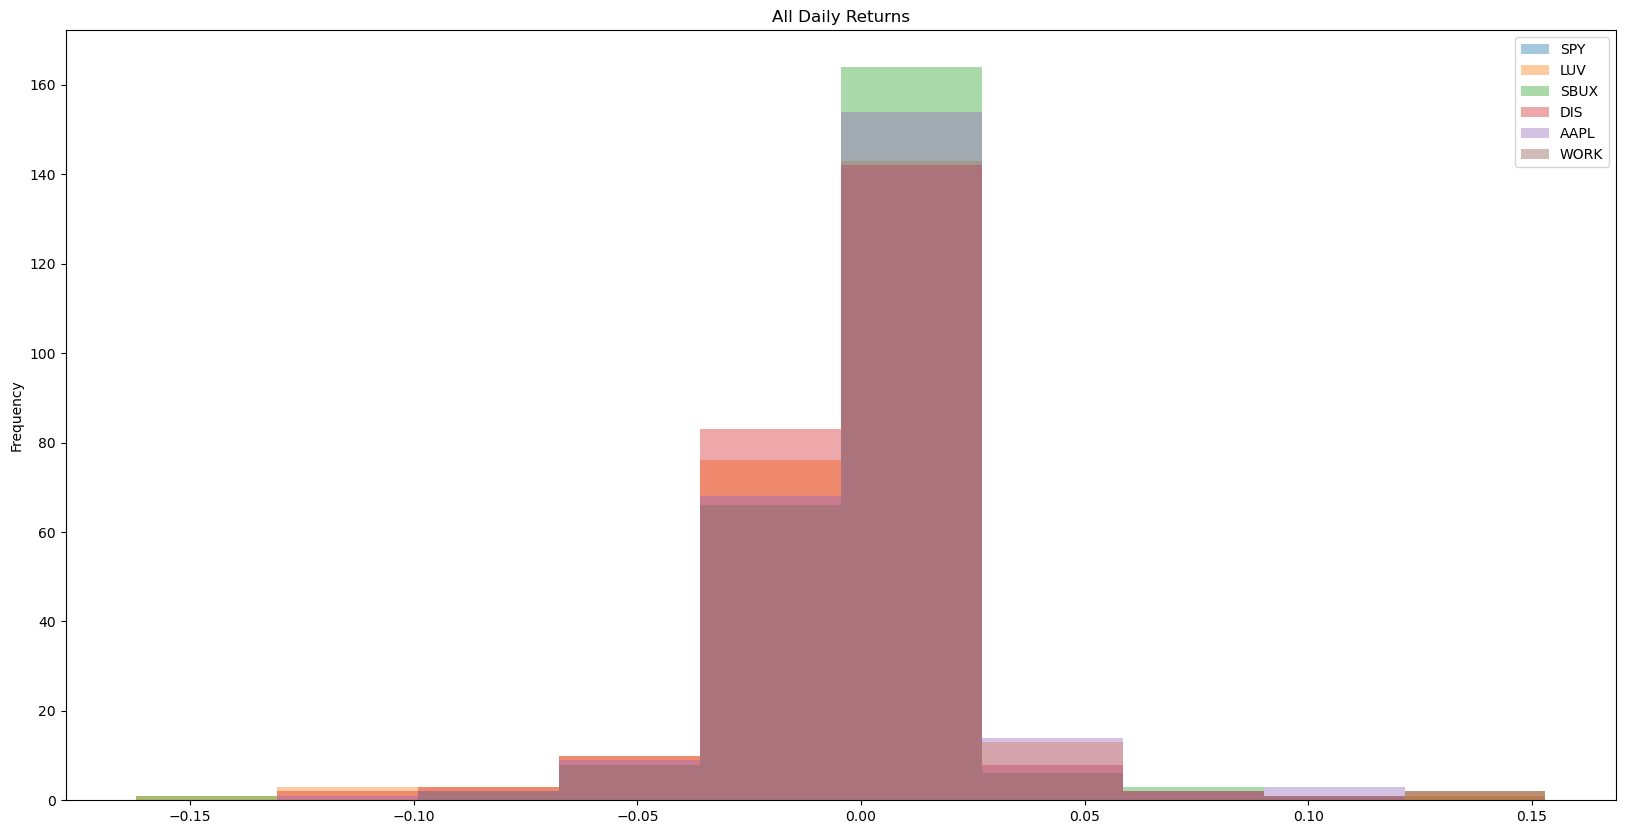

In [17]:
# Visualize the distribution of daily returns across all stocks using a histogram plot
# Hint: To make the plot easier to read, set the alpha arguement to 0.5
df_daily_returns.plot.hist(figsize =(20,10), alpha = 0.4, title="All Daily Returns", ylabel='Frequency')


ValueError: `dataset` input should have multiple elements.

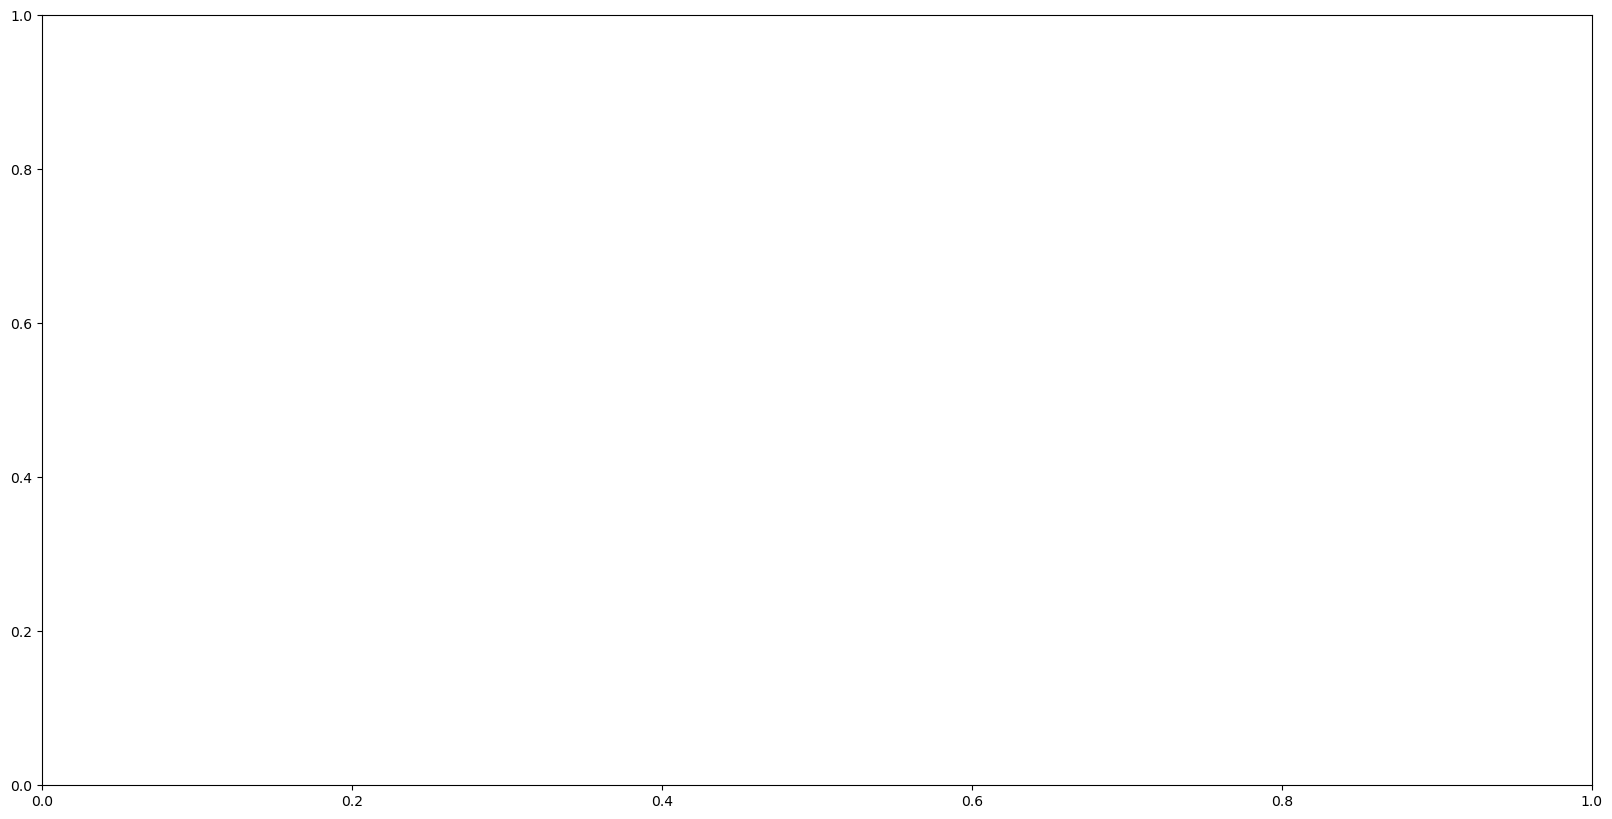

In [20]:
# Visualize the distribution of daily returns across all stocks using a density plot

df_daily_returns.plot.density(figsize =(20,10), xlim=[-0.1, 0.1], title="Density of Daily Returns")



